# Import Packages 

In [130]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Read Data File

In [9]:
data = pd.read_csv('salary.csv')

In [10]:
data.sample(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
285,44.0,Female,PhD,Senior Product Designer,15.0,150000.0
67,31.0,Female,Bachelor's,Customer Service Representative,5.0,45000.0
130,50.0,Female,Master's,Director of Operations,21.0,160000.0
122,33.0,Female,Bachelor's,Junior Operations Analyst,5.0,50000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
242,38.0,Female,Bachelor's,Senior Product Manager,10.0,120000.0
120,42.0,Female,Bachelor's,Sales Manager,17.0,100000.0
332,45.0,Female,PhD,Senior UX Designer,16.0,160000.0
23,36.0,Female,Bachelor's,Recruiter,9.0,60000.0
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0


# Data Preprocessing

In [12]:
data.shape

(375, 6)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [15]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [17]:
# Drop rows with null values
data = data.dropna()

In [19]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [30]:
# Check dublicated rows
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
370     True
371    False
372     True
373     True
374     True
Length: 373, dtype: bool


In [31]:
# Remove dublicated rows
data.drop_duplicates(inplace = True)

In [34]:
# Sum of dublicated rows
data.duplicated().sum()

0

In [97]:
le = LabelEncoder()

In [104]:
data['Education Level']= le.fit_transform(data['Education Level'])
data['Gender']= le.fit_transform(data['Gender'])

In [105]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,Software Engineer,5.0,90000.0
1,28.0,0,1,Data Analyst,3.0,65000.0
2,45.0,1,2,Senior Manager,15.0,150000.0
3,36.0,0,0,Sales Associate,7.0,60000.0
4,52.0,1,1,Director,20.0,200000.0


# Data Analysis

In [37]:
# Statistics Measurements
data.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


<Axes: xlabel='Education Level', ylabel='count'>

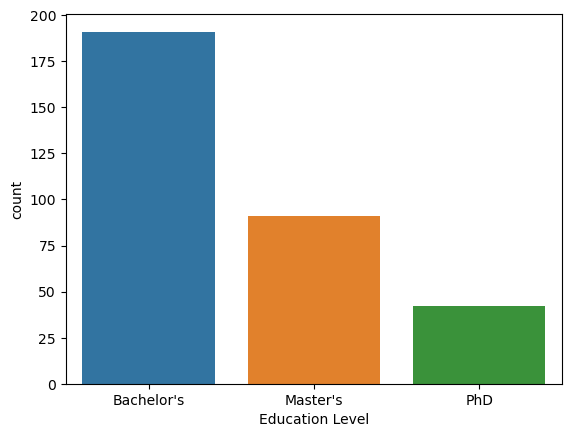

In [50]:
sns.countplot(data=data,x='Education Level')

<Axes: xlabel='Education Level', ylabel='Salary'>

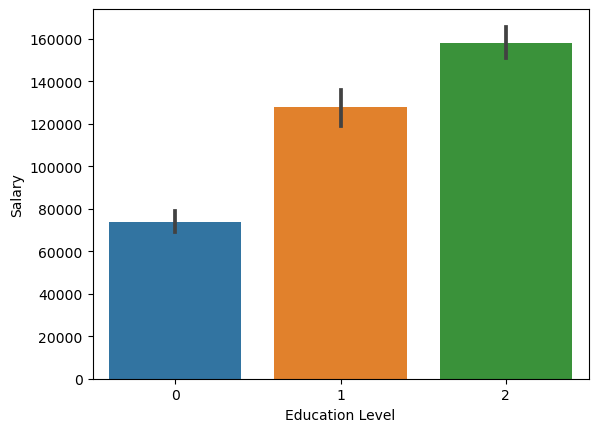

In [101]:
sns.barplot(x='Education Level',y='Salary',data=data)

<Axes: xlabel='Gender', ylabel='count'>

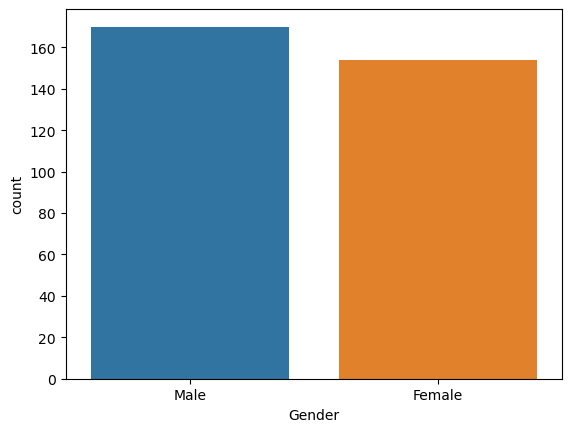

In [52]:
sns.countplot(data=data,x='Gender')

<Axes: xlabel='Gender', ylabel='Salary'>

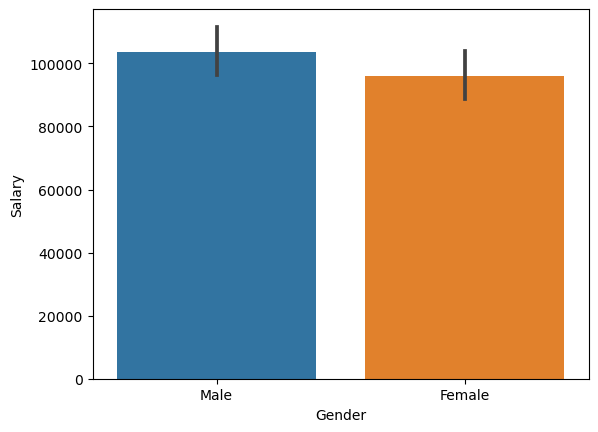

In [44]:
sns.barplot(x='Gender',y='Salary',data=data)

<Axes: xlabel='Education Level', ylabel='Salary'>

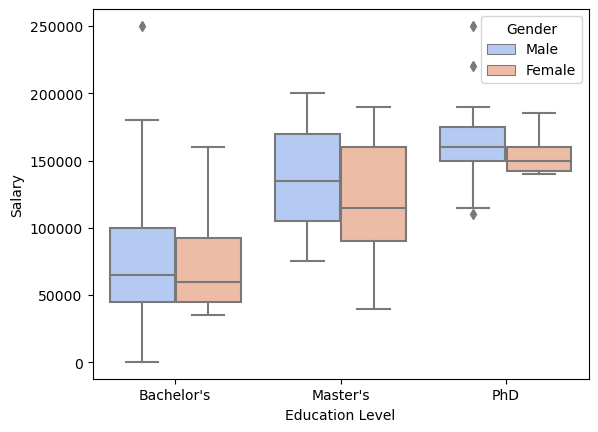

In [58]:
sns.boxplot(x='Education Level',y='Salary',hue='Gender',data=data,palette='coolwarm')

C:\Users\Mohamed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


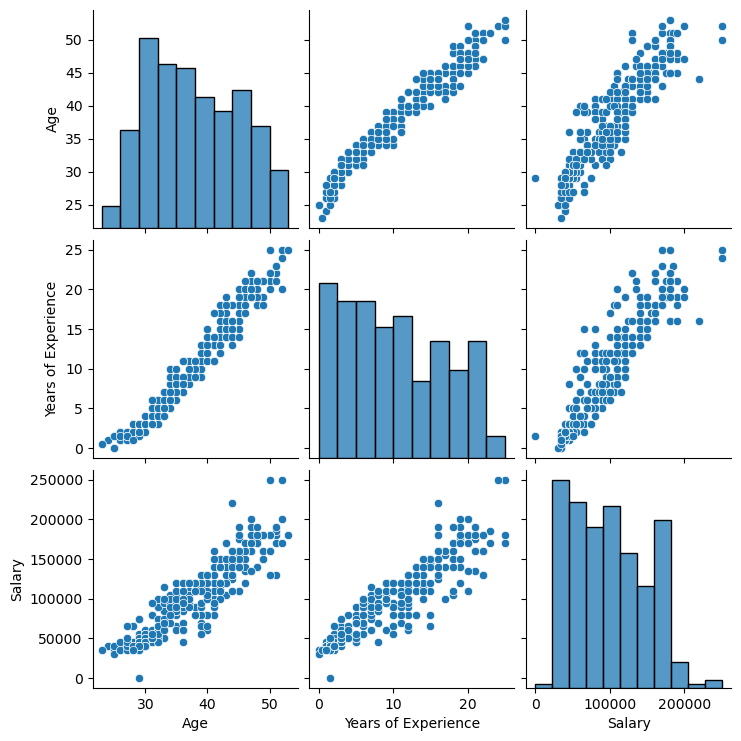

In [56]:
sns.pairplot(data)

# Data Splitting

In [108]:
new_data = data.drop('Job Title',axis=1)

In [109]:
new_data

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1,0,5.0,90000.0
1,28.0,0,1,3.0,65000.0
2,45.0,1,2,15.0,150000.0
3,36.0,0,0,7.0,60000.0
4,52.0,1,1,20.0,200000.0
...,...,...,...,...,...
348,28.0,0,0,1.0,35000.0
349,36.0,1,0,8.0,110000.0
350,44.0,0,2,16.0,160000.0
351,31.0,1,0,3.0,55000.0


In [111]:
x = new_data.iloc[:,:-1]
x

,Age,Gender,Education Level,Years of Experience
0,32.0,1,0,5.0
1,28.0,0,1,3.0
2,45.0,1,2,15.0
3,36.0,0,0,7.0
4,52.0,1,1,20.0
...,...,...,...,...
348,28.0,0,0,1.0
349,36.0,1,0,8.0
350,44.0,0,2,16.0
351,31.0,1,0,3.0


In [112]:
y = data.iloc[:,5]
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
348     35000.0
349    110000.0
350    160000.0
351     55000.0
371    170000.0
Name: Salary, Length: 324, dtype: float64

In [113]:
x = x.to_numpy()
y = y.to_numpy().reshape(-1,1)

In [114]:
x_train , x_test , y_train ,y_test = train_test_split( x , y , test_size = 0.2 )

In [115]:
print(f"The shape of X_train is {x_train.shape}")
print(f"The shape of Y_train is {y_train.shape}")
print(f"The shape of X_test is {x_test.shape}")
print(f"The shape of Y_test is {y_test.shape}")

The shape of X_train is (259, 4)
The shape of Y_train is (259, 1)
The shape of X_test is (65, 4)
The shape of Y_test is (65, 1)


# Model Training

In [116]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [117]:
reg.fit(x_train,y_train)

LinearRegression()

In [119]:
train_score = reg.score(x_train,y_train)
print(f'Training accuracy is {train_score}')

Training accuracy is 0.8868202418253543


In [120]:
y_pred = reg.predict(x_test)

In [122]:
test_score = reg.score(x_test,y_test)
print(f'Test accuracy is {test_score}')

Test accuracy is 0.9258322675695221
